In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [134]:
hod = pd.read_csv('Hospital_Operations_Data.csv')
pat = pd.read_csv('Patient_Data.csv')
suv =  pd.read_csv('Survey_Data.csv')
treat = pd.read_csv('Treatment_Data.csv')

In [3]:
print(treat.shape,pat.shape,suv.shape)

(1274000, 5) (294000, 5) (637000, 4)


In [4]:
hod.shape

(588000, 5)

In [5]:
hod.head(7)

,Date,Department,Beds_Occupied,Medical_Equipment_Usage,Staff_Hours_Worked
0,2023-01-01,Neurology,96,12,205
1,2023-01-01,Neurology,85,74,229
2,2023-01-01,Pediatrics,45,69,264
3,2023-01-01,Cardiology,72,18,245
4,2023-01-01,Orthopedics,54,26,252
5,2023-01-01,Pediatrics,70,50,284
6,2023-01-01,Cardiology,55,67,146


# Hopsital Operations Department 

In [135]:
hod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588000 entries, 0 to 587999
Data columns (total 5 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Date                     588000 non-null  object
 1   Department               588000 non-null  object
 2   Beds_Occupied            588000 non-null  int64 
 3   Medical_Equipment_Usage  588000 non-null  int64 
 4   Staff_Hours_Worked       588000 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 22.4+ MB


In [136]:
hod['year'] = pd.DatetimeIndex(hod['Date']).year
hod['month'] = pd.DatetimeIndex(hod['Date']).month

In [137]:
hod['month'].value_counts()

1     50840
3     50840
5     49600
7     49600
8     49600
10    49600
12    49600
4     48000
6     48000
9     48000
11    48000
2     46320
Name: month, dtype: int64

In [138]:
hod.year.value_counts()

2048    14640
2044    14640
2024    14640
2060    14640
2028    14640
2040    14640
2032    14640
2056    14640
2052    14640
2036    14640
2053    14600
2049    14600
2050    14600
2051    14600
2023    14600
2054    14600
2047    14600
2057    14600
2058    14600
2059    14600
2061    14600
2062    14600
2055    14600
2043    14600
2046    14600
2033    14600
2025    14600
2026    14600
2027    14600
2029    14600
2030    14600
2031    14600
2034    14600
2045    14600
2035    14600
2037    14600
2038    14600
2039    14600
2041    14600
2042    14600
2063     3600
Name: year, dtype: int64

In [130]:
hod['Date'] = pd.to_datetime(hod['Date'])

In [141]:
HOD_clean = hod.query('year < = 2024 ')
HOD_clean1= hod.query('year < 2024 ')
HOD_clean2 = hod.query('year == 2024 ')
HOD_clean2 = HOD_clean2.query('month < = 8 ')
HOD_clean = pd.concat([HOD_clean1,HOD_clean2])

In [142]:
HOD_clean.shape

(24360, 7)

In [143]:
HOD_clean.groupby(['year','month']).count()

Date  Department  Beds_Occupied  Medical_Equipment_Usage  \
year month                                                             
2023 1      1240        1240           1240                     1240   
     2      1120        1120           1120                     1120   
     3      1240        1240           1240                     1240   
     4      1200        1200           1200                     1200   
     5      1240        1240           1240                     1240   
     6      1200        1200           1200                     1200   
     7      1240        1240           1240                     1240   
     8      1240        1240           1240                     1240   
     9      1200        1200           1200                     1200   
     10     1240        1240           1240                     1240   
     11     1200        1200           1200                     1200   
     12     1240        1240           1240                     1240   
2024 1      1240        1240           1240                     1240   
     2      1160        1160           1160                     1160   
     3      1240        1240           1240                     1240   
     4      1200        1200           1200                     1200   
     5      1240        1240           1240                     1240   
     6      1200        1200           1200                     1200   
     7      1240        1240           1240                     1240   
     8      1240        1240           1240                     1240   

            Staff_Hours_Worked  
year month                      
2023 1                    1240  
     2                    1120  
     3                    1240  
     4                    1200  
     5                    1240  
     6                    1200  
     7                    1240  
     8                    1240  
     9                    1200  
     10                   1240  
     11                   1200  
     12                   1240  
2024 1                    1240  
     2                    1160  
     3                    1240  
     4                    1200  
     5                    1240  
     6                    1200  
     7                    1240  
     8                    1240

In [144]:
dept_grp = HOD_clean.groupby('Department')

In [145]:
dept_grp.mean()

,Beds_Occupied,Medical_Equipment_Usage,Staff_Hours_Worked,year,month
Department,,,,,
Cardiology,59.184920,54.878218,197.642828,2023.407233,5.670821
Neurology,59.759509,54.241309,199.395706,2023.398773,5.662781
Oncology,58.899694,54.319714,199.542594,2023.398161,5.726660
Orthopedics,58.913656,54.902225,199.007553,2023.404164,5.746683
Pediatrics,59.678586,54.743204,201.061690,2023.394814,5.799038


In [146]:
dept_month_grp = HOD_clean.groupby('month')

In [147]:
dept_month_grp.sum()

,Beds_Occupied,Medical_Equipment_Usage,Staff_Hours_Worked,year
month,,,,
1,147829,134687,497608,5018280
2,136054,127182,454545,4613600
3,146294,133926,496706,5018280
4,144218,129521,480009,4856400
5,145844,135553,493022,5018280
6,141948,131329,478577,4856400
7,147088,137174,490263,5018280
8,146441,135891,490761,5018280
9,70971,65516,236580,2427600


In [148]:
dept_grp.sum()

,Beds_Occupied,Medical_Equipment_Usage,Staff_Hours_Worked,year,month
Department,,,,,
Cardiology,289651,268574,967264,9902555,27753
Neurology,292224,265240,975045,9894420,27691
Oncology,288314,265895,976761,9904534,28032
Orthopedics,288618,268966,974938,9912657,28153
Pediatrics,285383,261782,961477,9675874,27731


In [149]:
HOD_clean.to_excel("Hospital_ops.xlsx",index=False)

# Patient Data  

In [62]:
pat.sort_values(by='Patient_ID')

,Patient_ID,Age,Gender,Medical_History,Diagnosis
0,1,64,M,Diabetes,Cancer
1,2,31,F,Diabetes,Hypertension
2,3,78,M,None,Infection
3,4,45,M,Hypertension,Diabetes
4,5,45,F,Hypertension,Flu
...,...,...,...,...,...
293995,293996,48,F,None,Hypertension
293996,293997,52,F,Hypertension,Flu
293997,293998,70,M,None,Diabetes
293998,293999,45,F,Diabetes,Cancer


In [63]:
pat.isna().sum()

Patient_ID         0
Age                0
Gender             0
Medical_History    0
Diagnosis          0
dtype: int64

In [64]:
pat.describe()

,Patient_ID,Age
count,294000.000000,294000.000000
mean,147000.500000,49.533959
std,84870.633908,28.870271
min,1.000000,0.000000
25%,73500.750000,25.000000
50%,147000.500000,50.000000
75%,220500.250000,75.000000
max,294000.000000,99.000000


In [79]:
p1 = pat.query('Age == 0')
p1

,Patient_ID,Age,Gender,Medical_History,Diagnosis
206,207,0,F,Diabetes,Cancer
416,417,0,F,None,Hypertension
758,759,0,F,Hypertension,Flu
769,770,0,M,None,Infection
822,823,0,M,Diabetes,Flu
...,...,...,...,...,...
293534,293535,0,M,Hypertension,Cancer
293577,293578,0,F,Hypertension,Diabetes
293689,293690,0,F,Hypertension,Diabetes
293917,293918,0,M,Diabetes,Hypertension


In [81]:
#new_pat = pat.drop(p1)

new_pat=pat[~pat.isin(p1)].dropna(how = 'all')
new_pat.shape

(291113, 5)

In [83]:
new_pat.Gender.value_counts()

M    145584
F    145529
Name: Gender, dtype: int64

c:\users\aniket.naik\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


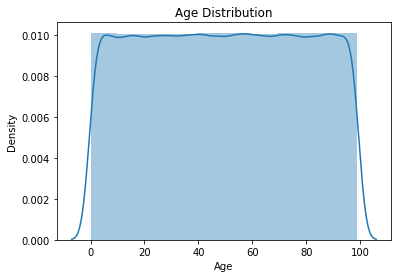

In [24]:
sns.distplot(pat['Age'],kde=True,bins=10)
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Age Distribution')
plt.show()

(array([29475., 29254., 29310., 29370., 29463., 29498., 29289., 29439.,
        29425., 29477.]),
 array([ 0. ,  9.9, 19.8, 29.7, 39.6, 49.5, 59.4, 69.3, 79.2, 89.1, 99. ]),
 <BarContainer object of 10 artists>)

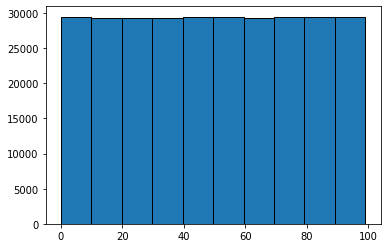

In [25]:
plt.hist(pat['Age'],edgecolor = 'black',bins=10)


In [84]:
new_pat.head()

,Patient_ID,Age,Gender,Medical_History,Diagnosis
0,1.0,64.0,M,Diabetes,Cancer
1,2.0,31.0,F,Diabetes,Hypertension
2,3.0,78.0,M,None,Infection
3,4.0,45.0,M,Hypertension,Diabetes
4,5.0,45.0,F,Hypertension,Flu


In [86]:
new_pat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 291113 entries, 0 to 293999
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Patient_ID       291113 non-null  float64
 1   Age              291113 non-null  float64
 2   Gender           291113 non-null  object 
 3   Medical_History  291113 non-null  object 
 4   Diagnosis        291113 non-null  object 
dtypes: float64(2), object(3)
memory usage: 13.3+ MB


# Suv Data  

In [26]:
suv.head(7)

,Patient_ID,Survey_Date,Satisfaction_Score,Comments
0,232652,2023-05-14 00:26:36,6,Very satisfied
1,115838,2023-11-17 14:44:06,6,Average
2,126918,2023-05-06 07:08:37,7,Not satisfied
3,6916,2023-10-04 21:59:22,7,Not satisfied
4,230166,2023-07-05 10:45:23,8,Unpleasant experience
5,244434,2023-08-12 12:04:37,7,Good service
6,144142,2023-10-26 07:47:17,6,Good service


In [40]:
suv_jd = suv.groupby('Patient_ID').agg({'Satisfaction_Score':'mean'})

In [73]:
#treat.groupby(['Patient_ID','Treatment_Type']).agg({'Cost':sum})

suv["Avg_satisfaction_score"] = suv.groupby("Patient_ID")["Satisfaction_Score"].transform("mean")
new_df = suv.set_index(['Patient_ID']).sort_index()
new_df["Avg_satisfaction_score"]

Patient_ID
1         6.0
1         6.0
1         6.0
1         6.0
2         4.0
         ... 
293999    1.0
294000    7.0
294000    7.0
294000    7.0
294000    7.0
Name: Avg_satisfaction_score, Length: 637000, dtype: float64

In [74]:
new_df.head()

,Survey_Date,Satisfaction_Score,Comments,year,month,Avg_satisfaction_score
Patient_ID,,,,,,
1,2023-08-24 14:31:14,8,Good service,2023,8,6.0
1,2023-07-06 04:25:15,2,Unpleasant experience,2023,7,6.0
1,2023-03-10 19:46:01,6,Good service,2023,3,6.0
1,2023-10-21 04:58:27,8,Very satisfied,2023,10,6.0
2,2023-12-19 07:39:54,4,Needs improvement,2023,12,4.0


In [103]:
suv["total_visits"] = suv.groupby("Patient_ID")["month"].transform("count")
new_df2 = suv.set_index(['Patient_ID']).sort_index()
new_df2

,Survey_Date,Satisfaction_Score,Comments,year,month,Avg_satisfaction_score,total_visits
Patient_ID,,,,,,,
1,2023-08-24 14:31:14,8,Good service,2023,8,6.0,4
1,2023-07-06 04:25:15,2,Unpleasant experience,2023,7,6.0,4
1,2023-03-10 19:46:01,6,Good service,2023,3,6.0,4
1,2023-10-21 04:58:27,8,Very satisfied,2023,10,6.0,4
2,2023-12-19 07:39:54,4,Needs improvement,2023,12,4.0,1
...,...,...,...,...,...,...,...
293999,2023-09-17 05:34:16,1,Unpleasant experience,2023,9,1.0,1
294000,2023-11-18 01:33:46,8,Good service,2023,11,7.0,4
294000,2023-03-24 07:39:56,5,Needs improvement,2023,3,7.0,4


In [104]:
new_df2.reset_index(inplace=True)

In [107]:
df2 = new_df2[['Patient_ID','Avg_satisfaction_score','total_visits']].drop_duplicates()
df2

,Patient_ID,Avg_satisfaction_score,total_visits
0,1,6.000000,4
4,2,4.000000,1
5,3,4.000000,1
6,4,5.500000,2
8,5,2.666667,3
...,...,...,...
636988,293996,1.666667,3
636991,293997,5.500000,2
636993,293998,5.500000,2
636995,293999,1.000000,1


In [27]:
suv.isna().sum()

Patient_ID            0
Survey_Date           0
Satisfaction_Score    0
Comments              0
dtype: int64

In [29]:
suv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 637000 entries, 0 to 636999
Data columns (total 4 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Patient_ID          637000 non-null  int64 
 1   Survey_Date         637000 non-null  object
 2   Satisfaction_Score  637000 non-null  int64 
 3   Comments            637000 non-null  object
dtypes: int64(2), object(2)
memory usage: 19.4+ MB


In [30]:
#convert to datetime
suv['Survey_Date'] = pd.to_datetime(suv['Survey_Date'])

In [31]:
suv['year'] = pd.DatetimeIndex(suv['Survey_Date']).year
suv['month'] = pd.DatetimeIndex(suv['Survey_Date']).month

In [32]:
suv['year'].value_counts()

2023    637000
Name: year, dtype: int64

In [91]:
new_df.reset_index(inplace=True)

In [92]:
new_df.to_excel('Survey_clean.xlsx',index=False)

## Treatment Data

In [34]:
treat.sort_values(by='Patient_ID')

,Treatment_ID,Patient_ID,Treatment_Type,Cost,Outcome
540989,540990,1,Therapy,4893,Stable
942932,942933,1,Medication,2751,Stable
705334,705335,1,Consultation,4155,Improved
318973,318974,1,Therapy,599,Improved
152111,152112,1,Surgery,474,Stable
...,...,...,...,...,...
7217,7218,294000,Therapy,2547,Stable
873420,873421,294000,Therapy,1825,Stable
584296,584297,294000,Medication,2301,Deteriorated
352738,352739,294000,Surgery,1891,Improved


12872

In [38]:
treat.groupby('Treatment_Type').agg({'Cost':sum})

,Cost
Treatment_Type,
Consultation,802618854
Medication,806198131
Surgery,801957795
Therapy,806459459


In [94]:
#treat.groupby(['Patient_ID','Treatment_Type']).agg({'Cost':sum})

treat["total_cost"] = treat.groupby("Patient_ID")["Cost"].transform("sum")
new_df = treat.set_index(['Patient_ID']).sort_index()
new_df["total_cost"]

Patient_ID
1         12872
1         12872
1         12872
1         12872
1         12872
          ...  
294000    15034
294000    15034
294000    15034
294000    15034
294000    15034
Name: total_cost, Length: 1274000, dtype: int64

In [97]:
new_df.reset_index(inplace=True)

In [98]:
new_df

,Patient_ID,Treatment_ID,Treatment_Type,Cost,Outcome,total_cost
0,1,540990,Therapy,4893,Stable,12872
1,1,942933,Medication,2751,Stable,12872
2,1,705335,Consultation,4155,Improved,12872
3,1,318974,Therapy,599,Improved,12872
4,1,152112,Surgery,474,Stable,12872
...,...,...,...,...,...,...
1273995,294000,7218,Therapy,2547,Stable,15034
1273996,294000,873421,Therapy,1825,Stable,15034
1273997,294000,584297,Medication,2301,Deteriorated,15034
1273998,294000,352739,Surgery,1891,Improved,15034


In [101]:
df1 = new_df[['Patient_ID','total_cost']]
df1.drop_duplicates()

,Patient_ID,total_cost
0,1,12872
5,2,12986
9,3,13330
16,4,16017
24,5,6963
...,...,...
1273980,293996,11061
1273984,293997,4167
1273986,293998,7277
1273990,293999,11308


In [46]:
treat.shape

(1274000, 5)

In [77]:
treat.Outcome.value_counts()

Deteriorated    424929
Improved        424924
Stable          424147
Name: Outcome, dtype: int64

In [78]:
treat.isna().sum()

Treatment_ID      0
Patient_ID        0
Treatment_Type    0
Cost              0
Outcome           0
dtype: int64

In [92]:
treat_bad = treat[treat['Outcome'] == 'Deteriorated']
treat_stable = treat[treat['Outcome'] == 'Stable']
treat_good = treat[treat['Outcome'] == 'Improved']

In [94]:
treat_bad.Patient_ID.count()

424929

In [95]:
treat_good.Treatment_Type.value_counts()

Medication      106503
Therapy         106464
Surgery         106125
Consultation    105832
Name: Treatment_Type, dtype: int64

In [96]:
treat_stable.Treatment_Type.value_counts()

Medication      106407
Therapy         105975
Surgery         105969
Consultation    105796
Name: Treatment_Type, dtype: int64

In [101]:
treat.groupby(['Treatment_Type','Cost'])

In [113]:
print(new_pat.shape,df1.shape,df2.shape)

(291113, 5) (290270, 2) (260741, 3)


In [111]:
df1.drop_duplicates(inplace=True)

c:\users\aniket.naik\appdata\local\programs\python\python38\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [110]:
df2.head()

,Patient_ID,Avg_satisfaction_score,total_visits
0,1,6.000000,4
4,2,4.000000,1
5,3,4.000000,1
6,4,5.500000,2
8,5,2.666667,3


# JOINING 3 dataframes on Patient_ID


In [114]:
d= pd.merge(new_pat,df1,on="Patient_ID",how="inner")
d2 = pd.merge(d,df2,on="Patient_ID",how="inner")


In [115]:
d2.shape

(254892, 8)

In [116]:
d2.head()

,Patient_ID,Age,Gender,Medical_History,Diagnosis,total_cost,Avg_satisfaction_score,total_visits
0,1.0,64.0,M,Diabetes,Cancer,12872,6.000000,4
1,2.0,31.0,F,Diabetes,Hypertension,12986,4.000000,1
2,3.0,78.0,M,None,Infection,13330,4.000000,1
3,4.0,45.0,M,Hypertension,Diabetes,16017,5.500000,2
4,5.0,45.0,F,Hypertension,Flu,6963,2.666667,3


In [123]:
d2['Patient_ID'] = d2['Patient_ID'].astype(int)
d2['Patient_ID'] = d2['Patient_ID'].astype(object)
d2['Age'] = d2['Age'].astype(int)
d2['Avg_satisfaction_score'] = d2['Avg_satisfaction_score'].round(2)

In [124]:
d2.head()

,Patient_ID,Age,Gender,Medical_History,Diagnosis,total_cost,Avg_satisfaction_score,total_visits
0,1,64,M,Diabetes,Cancer,12872,6.00,4
1,2,31,F,Diabetes,Hypertension,12986,4.00,1
2,3,78,M,None,Infection,13330,4.00,1
3,4,45,M,Hypertension,Diabetes,16017,5.50,2
4,5,45,F,Hypertension,Flu,6963,2.67,3


In [125]:
d2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 254892 entries, 0 to 254891
Data columns (total 8 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Patient_ID              254892 non-null  object 
 1   Age                     254892 non-null  int32  
 2   Gender                  254892 non-null  object 
 3   Medical_History         254892 non-null  object 
 4   Diagnosis               254892 non-null  object 
 5   total_cost              254892 non-null  int64  
 6   Avg_satisfaction_score  254892 non-null  float64
 7   total_visits            254892 non-null  int64  
dtypes: float64(1), int32(1), int64(2), object(4)
memory usage: 16.5+ MB


In [127]:
d2.isna().sum()

Patient_ID                0
Age                       0
Gender                    0
Medical_History           0
Diagnosis                 0
total_cost                0
Avg_satisfaction_score    0
total_visits              0
dtype: int64

In [129]:
d2.to_excel("Merged_data.xlsx",index=False)